# Experiência 2: Projeto de Filtros FIR

Jean Carlos Mello Xavier Faria - 11259628

Oliver de Noronha Rissato - 11375361

Primeiramente vamos importar as bibliotecas necessárias

In [41]:
using Plots, DSP, LinearAlgebra, LaTeXStrings, Polynomials, Roots

$\textbf{1)}$ Neste exercício iremos projetar os filtros solicitados utilizando o método de mínimos quadrados:
$\\ \ \textbf{a)}$ O primeiro é um filtro passa baixas com frequência de corte $ \omega_c = \frac{\pi}{4}$.  
Utilizaremos 101 coeficiêntes para aproximar o projeto à um filtro ideal

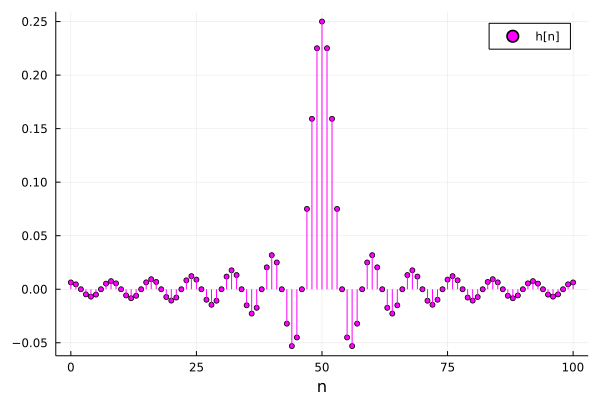

In [42]:
N = 101
n = 0:N - 1
L = (N - 1) ÷ 2
ωc = π/4
h = (ωc/π) * sinc.( (ωc / π) * (n .- L))

plot(n, h, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)

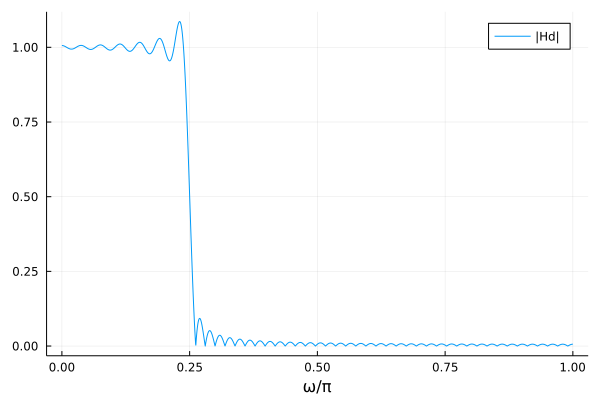

In [43]:
hdf = PolynomialRatio(h, [1])
ω = range(0, π, length = 2500)
Hd = freqresp(hdf, ω)
plot(ω / π, abs.(Hd), label = "|Hd|", xlabel = "ω/π")

$\\ \ \textbf{b)}$ O segundo é um filtro passa altas com frequência de corte $ \omega_c = \frac{\pi}{4}$.  
Utilizaremos 101 coeficientes para aproximar o projeto à um filtro ideal

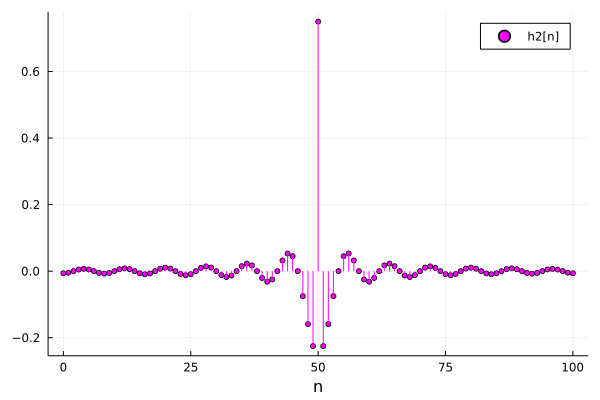

In [44]:
n2 = 0:N - 1
h2 = ((π-ωc)/π) * sinc.( ((π-ωc)/π) * (n2 .- L)) .* (-1).^(n2)
plot(n2, h2, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h2[n]", color = :magenta)

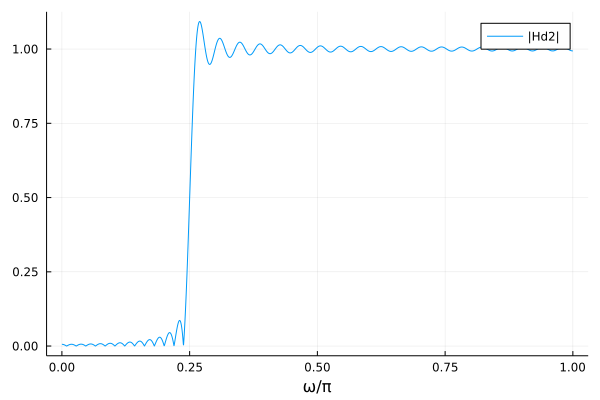

In [45]:
hdf2 = PolynomialRatio(h2, [1])
ω = range(0, π, length = 2500)
Hd2 = freqresp(hdf2, ω)
plot(ω / π, abs.(Hd2), label = "|Hd2|", xlabel = "ω/π")

$\textbf{2)}$ Para esse exercício foi implementada uma função que recebe um sinal de entrada e um filtro, e realiza a convolução entre os sinais

In [53]:
function filtro(h, x)
    y = zeros(length(x))
    N = length(h)
    k = length(x)
    for n in 1:k
        for i in 0:n-1
            y[n] = y[n] + h[i+1]*x[n-i]
        end
    end
    
    return y
            
end
    

filtro (generic function with 1 method)

$\textbf{3)}$ Para testarmos os filtros projetados, criamos o sinal que representa uma soma de cossenos com frequências $\frac{\pi}{20} \ e \ \frac{\pi}{3}$

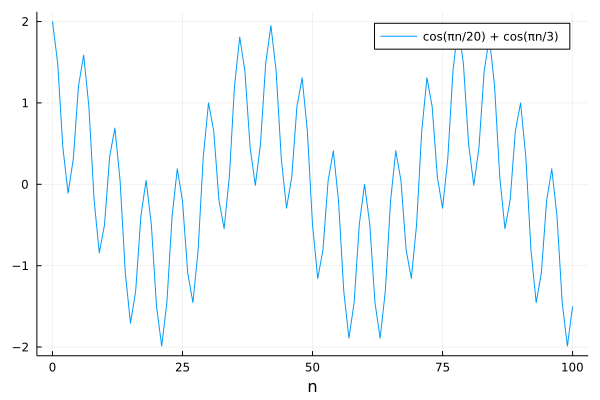

In [58]:
x1 = cos.(π*n/20)
x2 = cos.(π*n/3)
x = x1+x2

plot(n, x, label="cos(πn/20) + cos(πn/3)", xlabel="n")

Utilizando a função filt() da biblioteca do Julia e a função filtro() criada, podemos perceber que ambas funcionam da mesma forma e fornecem o mesmo sinal de saida

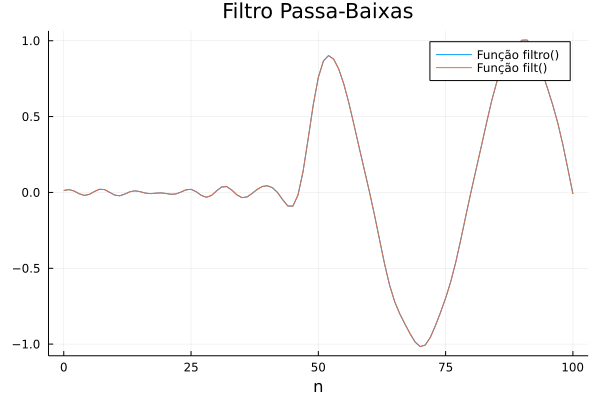

In [67]:
y11 = filtro(h, x);
y12 = filt(h, [1], x)

plot(n, y11, label="Função filtro()", xlabel="n", title="Filtro Passa-Baixas")
plot!(n, y12, label="Função filt()")

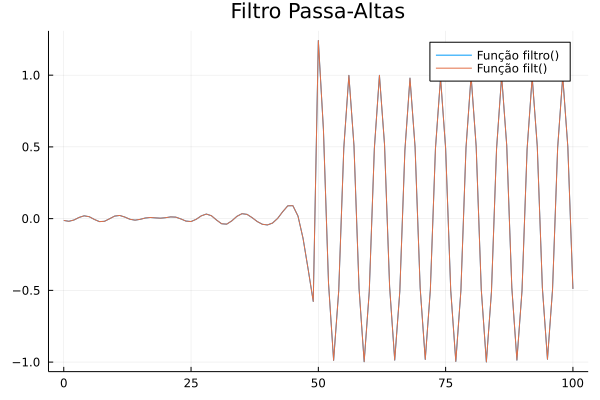

In [66]:
y21 = filtro(h2, x);
y22 = filt(h2, [1], x)

plot(n, y21, label="Função filtro()", title="Filtro Passa-Altas")
plot!(n, y22, label="Função filt()")

A resposta em frequência do filtro passa-baixas pode ser visto a seguir.

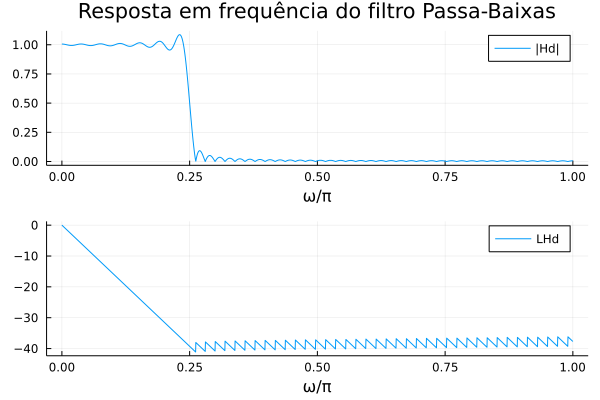

In [65]:
p1 = plot(ω / π, abs.(Hd), label = "|Hd|", xlabel = "ω/π", title="Resposta em frequência do filtro Passa-Baixas")
pHd = phaseresp(hdf, ω)
p2 = plot(ω / π, unwrap(pHd), label = "LHd", xlabel = "ω/π")
plot(p1, p2, layout=(2,1))

Já a resposta em frequência do filtro Passa-Altas, pode ser visto na imagem a seguir.

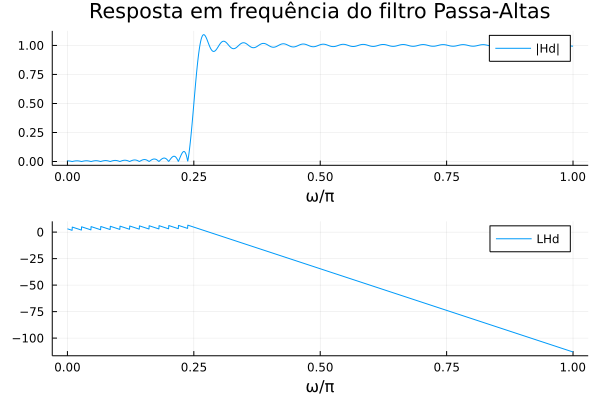

In [64]:
p1 = plot(ω / π, abs.(Hd2), label = "|Hd|", xlabel = "ω/π", title="Resposta em frequência do filtro Passa-Altas")
pHd2 = phaseresp(hdf2, ω)
p2 = plot(ω / π, unwrap(pHd2), label = "LHd", xlabel = "ω/π")
plot(p1, p2, layout=(2,1))

Comparando os sinais de entrada com a saída podemos notar a defasagem esperada o sinal

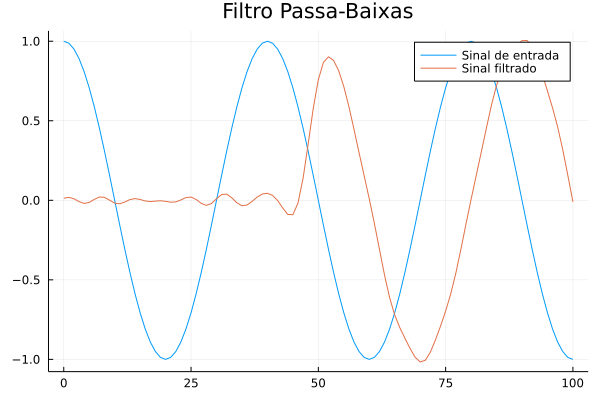

In [62]:
plot(n, x1, label="Sinal de entrada", title="Filtro Passa-Baixas")
plot!(n, y11, label="Sinal filtrado")

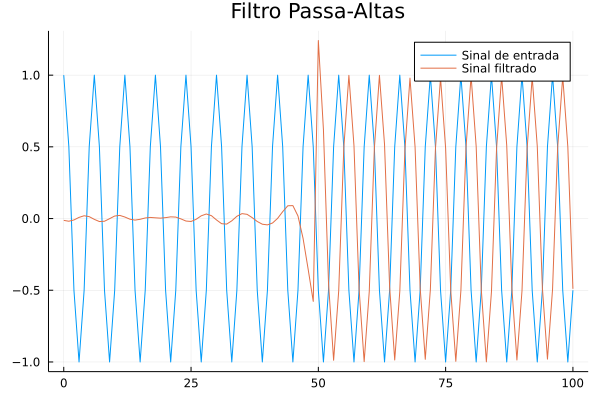

In [68]:
plot(n, x2, label="Sinal de entrada", title="Filtro Passa-Altas")
plot!(n, y21, label="Sinal filtrado")

# Filtro Passa Baixas com Janela de Kaiser

In [14]:
ωp = π/20
ωr = π/3
ωc = (ωp + ωr)/2

A = -20*log10(0.001)
print(A)
β = 0.1102*(A-8.7)


60.0

5.65326

In [15]:
N = (A-8)/(2.285*(ωr-ωp))+1
N = Int64(ceil(N))

27

In [16]:
M=N-1
L=(N-1)/2

13.0

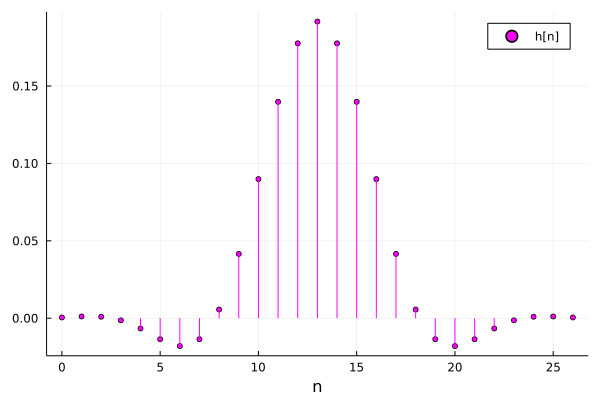

In [18]:
n=0:M
h=(ωc/π)*sinc.((ωc/π)*(n.-L)).*kaiser(N,β/π)

plot(n, h, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)

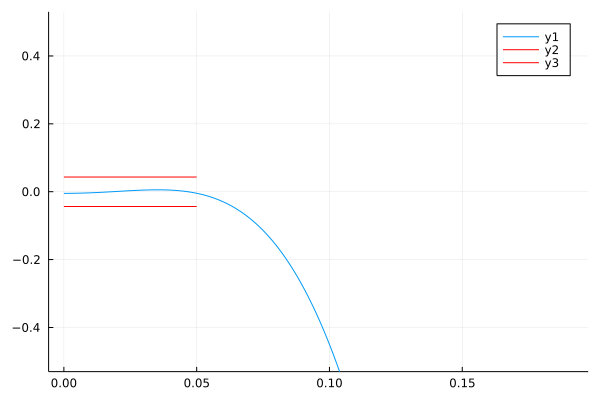

In [19]:
hf=PolynomialRatio(h,[1])
ω=range(0,π,length=5000)
H=freqz(hf,ω)
plot(ω/π,20*log10.(abs.(H)), xlim = [0 , ωc/π], ylim = [-0.5, 0.5])
plot!([0;ωp/π],20*log10.([0.995;0.995]),color="red")
plot!([0;ωp/π],20*log10.([1.005;1.005]),color="red")

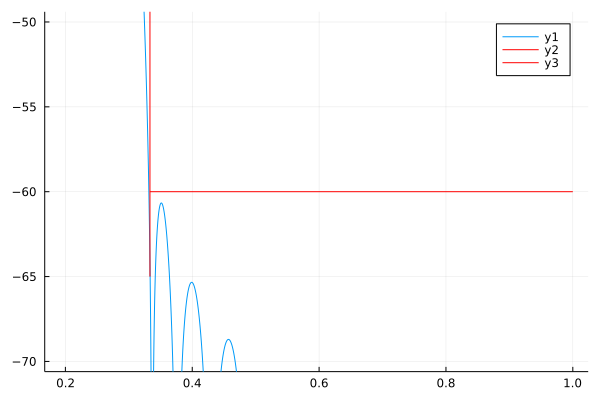

In [20]:
plot(ω/π,20*log10.(abs.(H)), xlim = [ωc/π,1], ylim = [-A-10,-A+10])
plot!([ωr;π]/π,20*log10.([0.001;0.001]),color="red")
plot!([ωr;ωr]/π,[-65;5],color="red")


# Filtro Passa altas com Janela de Kaiser

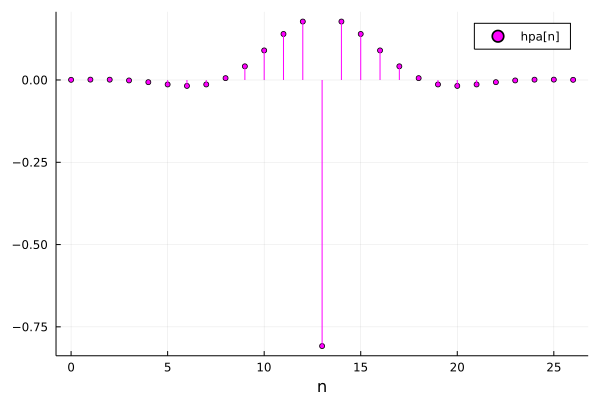

In [22]:
ωp_h = π - π/20
ωr_h = π - π/3
ωc_h = (ωp_h + ωr_h)/2

hpa=(ωc_h/π)*sinc.((ωc_h/π)*(n .- L)).*(-1).^(0:M).*kaiser(N,β/π)
hfpa=PolynomialRatio(hpa,[1])
plot(n, hpa, line = :stem, marker = (:circle, 3), xlabel = "n", label = "hpa[n]", color = :magenta)

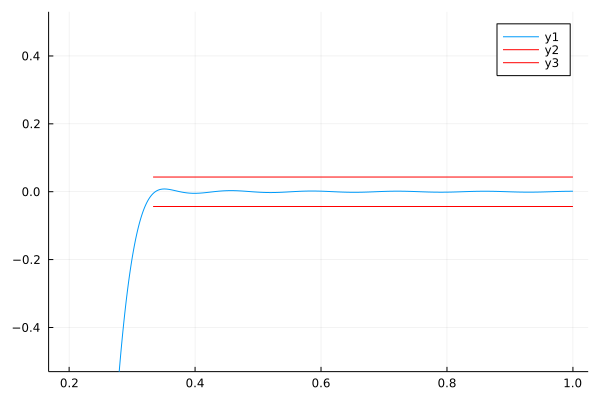

In [23]:
Hpa=freqz(hfpa,ω)
plot(ω/π,20*log10.(abs.(Hpa)), xlim = [ωc/π, 1], ylim = [-0.5, 0.5])
plot!([ωr/π;1],20*log10.([0.995;0.995]),color="red")
plot!([ωr/π;1],20*log10.([1.005;1.005]),color="red")

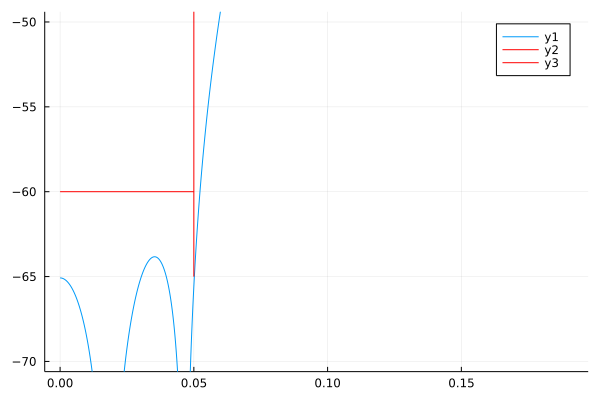

In [24]:
plot(ω/π,20*log10.(abs.(Hpa)), xlim = [0,ωc/π], ylim = [-A-10,-A+10])
plot!([0;ωp]/π,20*log10.([0.001;0.001]),color="red")
plot!([ωp;ωp]/π,[-65;5],color="red")

# Filtro Passa-Baixas com método min-max

In [30]:
ωp = π/20
ωr = π/3
Δω = ωr - ωp
δp =  0.005
δr = 0.001

ωc = (ωp + ωr)/2


0.6021385919380436

In [31]:
N = ceil(Int,(-10*log10(δp*δr)-13)/(2.324*Δω)) + 3

23

In [32]:
h = remez(N, [(0, ωp/2π) => (1,1), (ωr/2π, 0.5) => (0, δp/δr)])
M = N-1
L = M/2

11.0

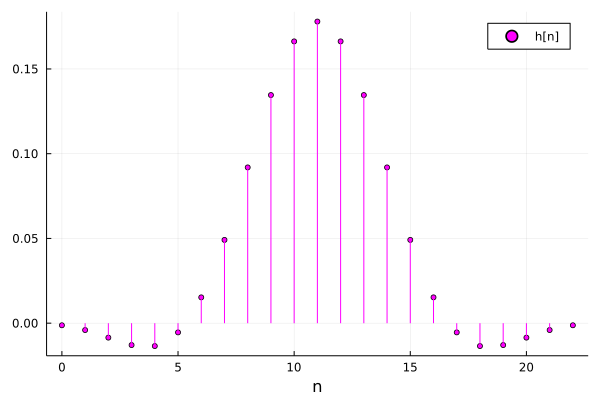

In [33]:
n = 0:M
plot(n, h, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)


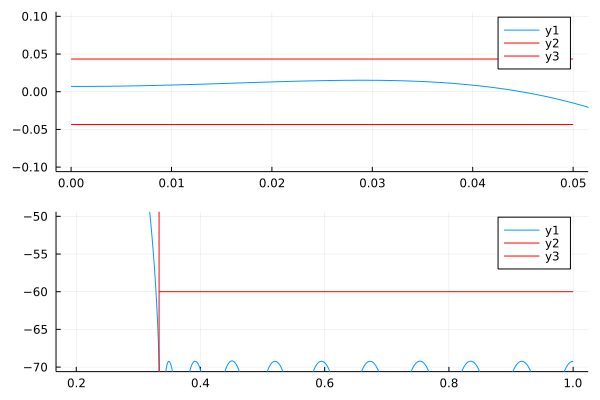

In [34]:
hf = PolynomialRatio(h, [1])
H = freqz(hf, ω)
p1 = plot(ω/π, 20*log10.(abs.(H)), xlim = [0, 0.05], ylim = [-0.1, 0.1])
p1 = plot!([0;ωp/π], 20*log10.([1-δp;1-δp]),color = "red")
p1 = plot!([0;ωp/π], 20*log10.([1+δp;1+δp]), color = "red")

p2 = plot(ω/π, 20*log10.(abs.(H)),  xlim = [ωc/π,1], ylim = [-A-10,-A+10])
p2 = plot!([ωr;π]/π, 20*log10.([δr;δr]), color="red")
p2 = plot!([ωr;ωr]/π, [-A-15;5], color="red")

plot(p1,p2, layout=(2,1))

# Filtro Passa-Altas com método min-max

ωp_h = π/20
ωr_h = π/3
ωc_h = (ωp_h + ωr_h)/2

hpa = remez(N, [(0, ωp/2π) => (0, δp/δr), (ωr/2π, 0.5) => (1,1)])

plot(n, hpa, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)

In [ ]:
ωp_h = π/20
ωr_h = π/3
ωc_h = (ωp_h + ωr_h)/2

hpa = remez(N, [(0, ωp/2π) => (0, δp/δr), (ωr/2π, 0.5) => (1,1)])

plot(n, hpa, line = :stem, marker = (:circle, 3), xlabel = "n", label = "h[n]", color = :magenta)

In [ ]:
hf = PolynomialRatio(hpa, [1])
H = freqz(hf, ω)
p1 = plot(ω/π, 20*log10.(abs.(H)),xlim = [ωc/π, 1], ylim = [-0.5, 0.5])
p1 = plot!([ωr/π;1], 20*log10.([1-δp;1-δp]),color = "red")
p1 = plot!([ωr/π;1], 20*log10.([1+δp;1+δp]), color = "red")

p2 = plot(ω/π, 20*log10.(abs.(H)), xlim = [0,ωc/π], ylim = [-A-10,-A+10])
p2 = plot!([0;ωp]/π, 20*log10.([0.001;0.001]), color="red")
p2 = plot!([ωp;ωp]/π, [-65;5], color="red")

plot(p1,p2, layout=(2,1))